<a href="https://colab.research.google.com/github/sdias22/Processamento-Digital-de-Img/blob/main/01_introducao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aula 01: Introdução

Olá, seja muito bem vindo ao nosso primeiro "*notebook*" de **PDI**.

Neste notebook, veremos como **ler** e **exibir imagens** em python.

O primeiro passo é importar as **bibliotecas** necessárias para fazer estas operações.

Execute o trecho de código abaixo para importar estas bibliotecas.

(Este material é do prof. Zampirolli, com erros do prof. Noma.)


In [ ]:
from skimage import io
from google.colab.patches import cv2_imshow
import cv2
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

No exemplo abaixo, vamos abrir o nosso primeiro exemplo de imagem.

Como estamos no ambiente **online** do colab, usaremos sempre imagens da web ou do google drive.

Execute o trecho abaixo e veja o que acontece.

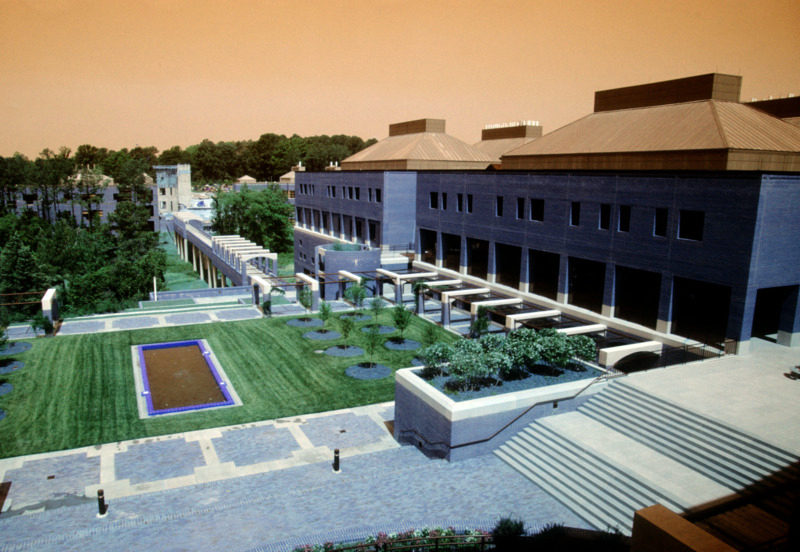

In [33]:
url = "https://iiif.lib.ncsu.edu/iiif/0052574/full/800,/0/default.jpg"
image = io.imread(url)
cv2_imshow(image)

### Imagens coloridas RGB

No exemplo anterior, note que as cores estão um pouco diferentes.

Isto pode acontecer de acordo com a ferramenta que você estiver usando.

No caso, estamos usando a biblioteca do OpenCV para exibir a imagem.

No código abaixo, converteremos as cores para **RGB** e ver o que acontece.

Execute para ver o resultado.

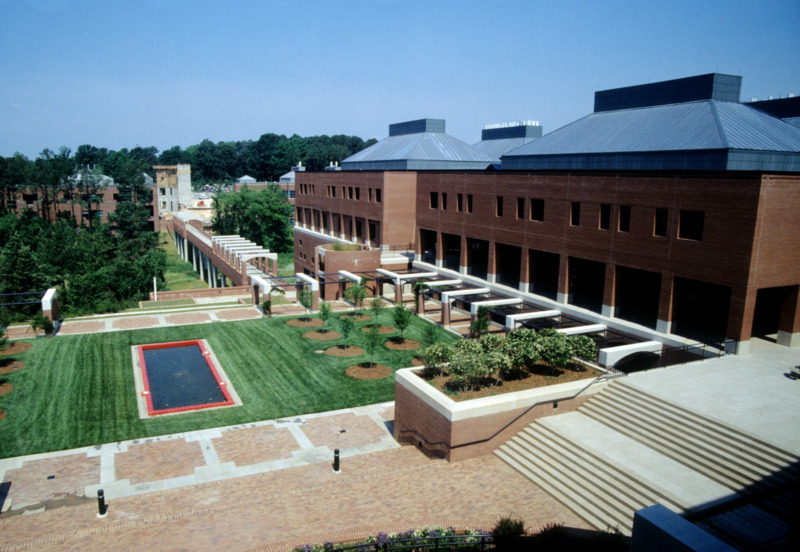

In [34]:
image2 = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
cv2_imshow(image2)

### Concatenação de imagens

A seguir, ilustraremos um outro exemplo de imagem.

Mas desta vez, exibiremos as duas versões (a original e a convertida para RGB), uma ao lado da outra.

Execute o código e veja o resultado.

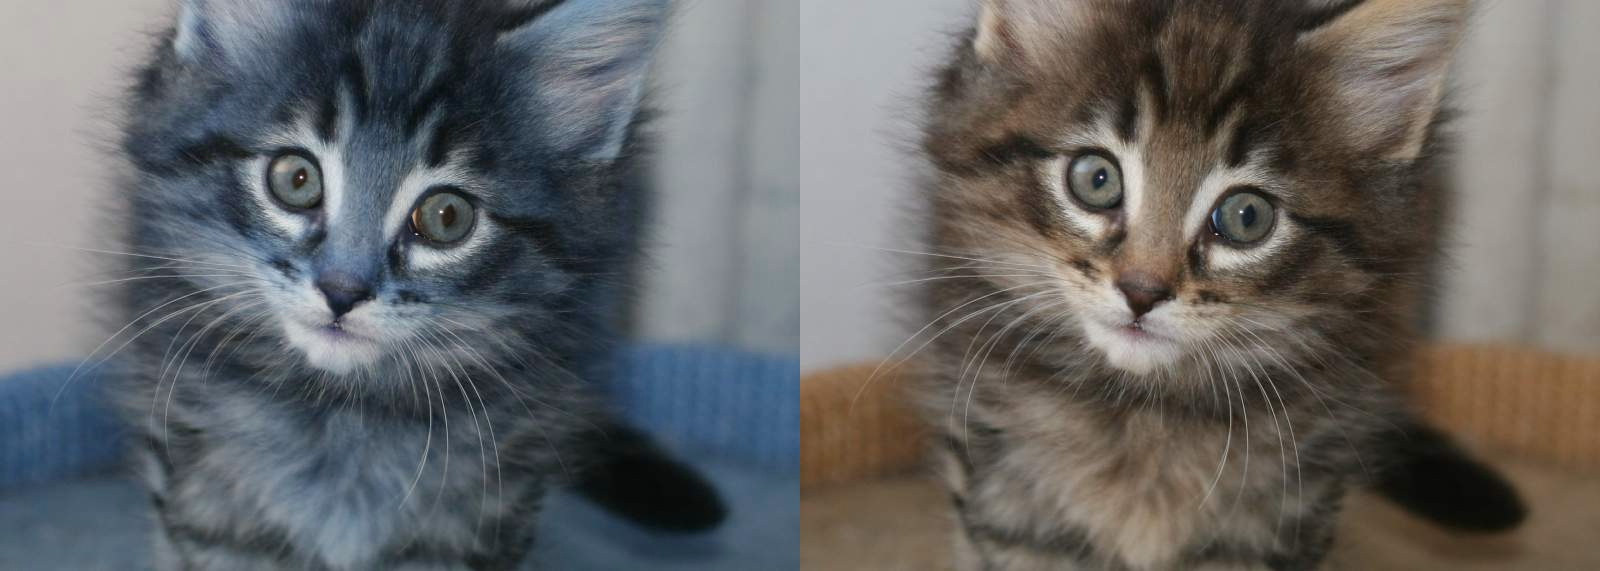

In [6]:
url = "https://placekitten.com/800/571"
im = io.imread(url)
im2 = cv2.cvtColor(im, cv2.COLOR_BGR2RGB) # RGB
im3 = cv2.hconcat((im, im2))
cv2_imshow(im3)

### Representação de imagens por matriz

Mas como representamos uma imagem RGB no computador?

Seria uma matriz?

Ou um "cubo"?

Vamos averiguar...

No trecho de código abaixo, imprimiremos o tipo de dados e a forma (*shape*) da imagem.

Execute o código para ver o que acontece.

In [7]:
print(im2.dtype)  # unsigned int 8 bits
print(im2.shape)  # matriz 571x800, 3 canais

uint8
(571, 800, 3)


No exemplo anterior, a imagem consiste de 3 canais ou bandas.

Cada banda é uma matriz de níveis de cinza!

Vamos exibir cada um deses 3 canais?

Execute o código abaixo e veja o que acontece.

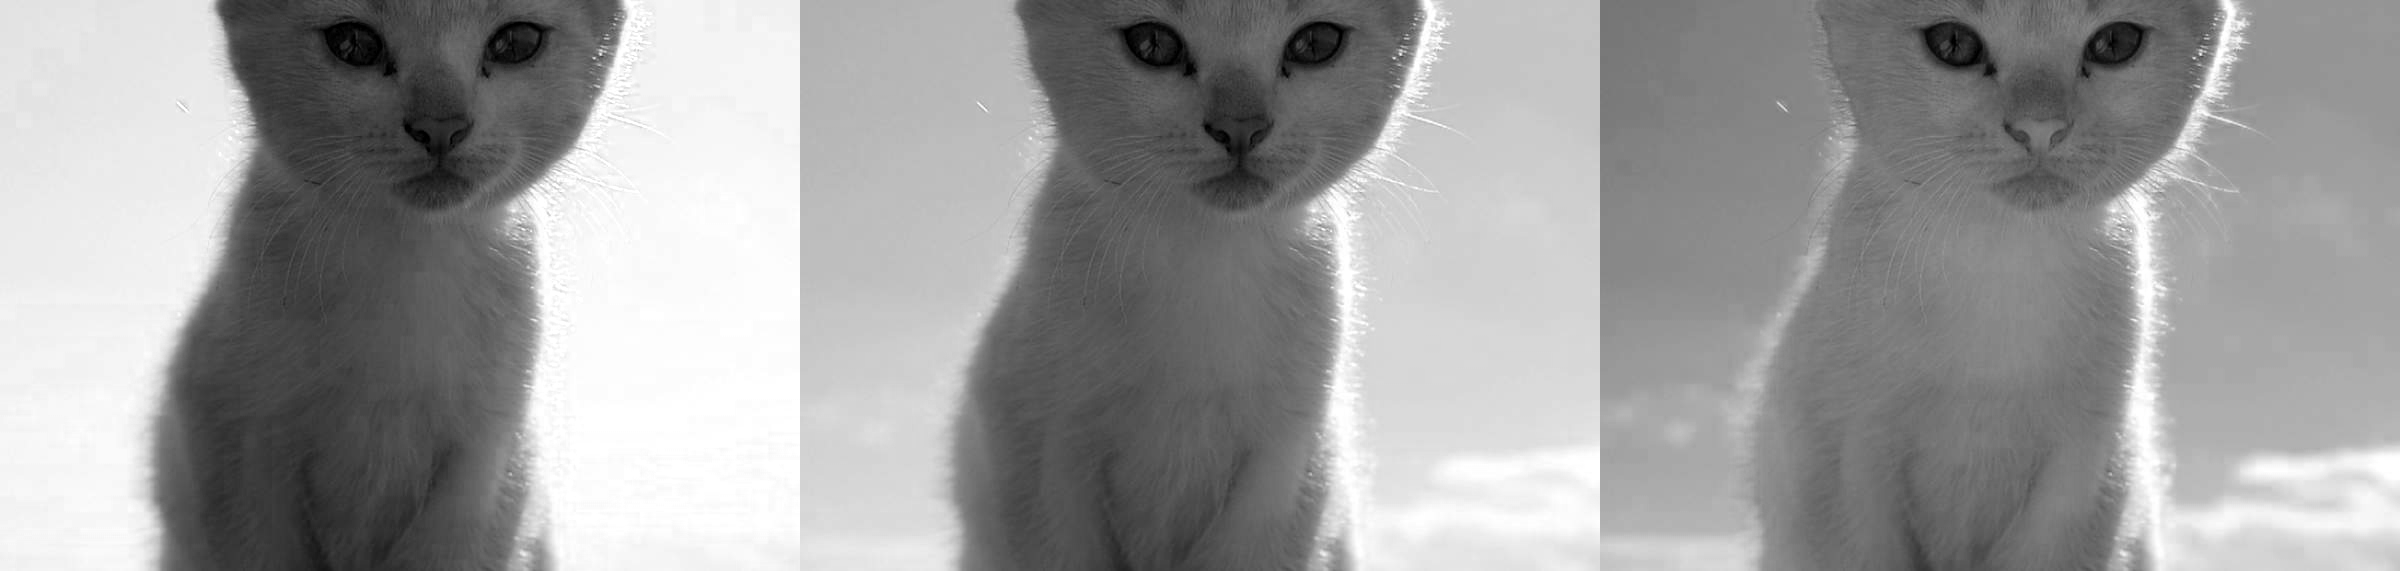

In [5]:
# gray = im2[:,:,0]
gray = cv2.hconcat((im2[:,:,0], im2[:,:,1],im2[:,:,2]))
cv2_imshow(gray)

### Conversão para níveis de cinza (grayscale)

Em muitas das atividades, trabalharemos com imagens em níveis de cinza.

No caso de uma imagem colorida, podemos por exemplo pegar um dos 3 canais de níveis de cinza... ou simplesmente fazer uma conversão conforme abaixo.

Execute o código e veja o que acontece.

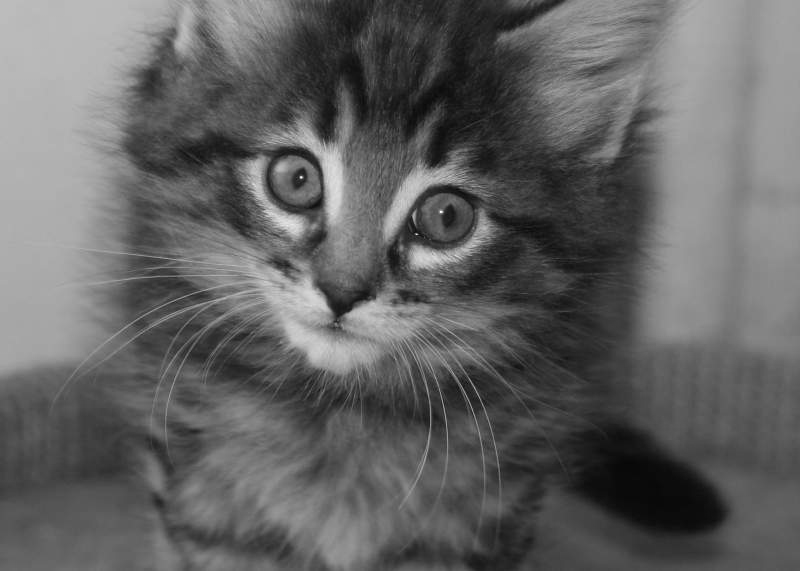

In [9]:
gray2 = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray2)

### Recorte de imagens

Em python, é muito fácil obter "recortes" de uma matriz.

Ou seja...

Mostrar apenas um recorte de uma imagem é muito fácil... no exemplo abaixo, usamos a biblioteca **pyplot**.

Execute o código abaixo.

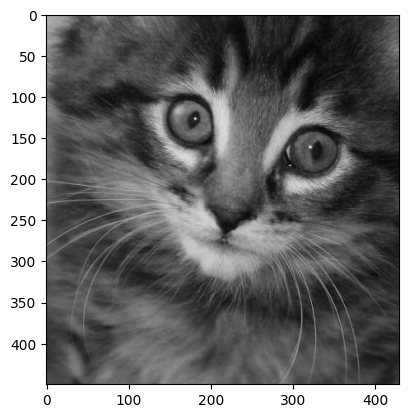

In [10]:
imCut = gray2[50:500,120:550]
plt.imshow(imCut, 'gray')

### Binarização baseada em limiar

Até aqui, vimos como abrir e mostrar uma imagem... usamos imagens coloridas e em níveis de cinza.

Agora, mostraremos um exemplo binário.

Vamos converter a imagem para binário?

Em uma imagem binária, temos apenas 2 níveis de cinza: 0 (preto) e 1 (branco).

Uma maneira simples de binarizar uma imagem (em níveis de cinza) é considerar um **limiar**.

Acima do valor do limiar vira branco (1) e abaixo vira preto (0).

Execute os trechos de códigos e veja o que acontece.

In [11]:
# dimensoes da imagem: altura e largura
print (imCut.shape)
h,w = imCut.shape

(450, 430)


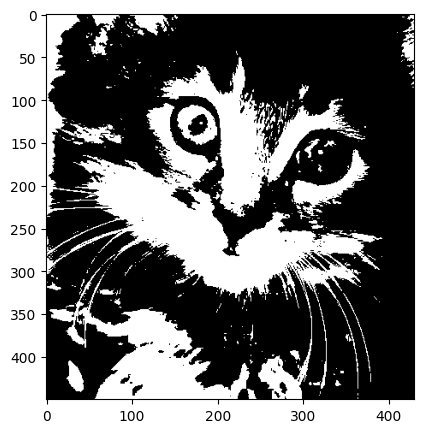

In [12]:
# binariza a imagem usando o limiar
limiar = 100
imBin = np.zeros_like(imCut)
for i in range(h): # para cada linha
    for j in range(w): # para cada coluna
        if imCut[i,j] > limiar:
            imBin[i,j] = 255

plt.figure(figsize=(5,5))
plt.imshow(imBin, 'gray')

No código anterior, a binarização foi feita da maneira tradicional, percorrendo-se cada um dos pixels.

Mas em python, podemos trabalhar com matrizes de maneira mais direta.

Veja o exemplo de código abaixo.

Ele faz a mesma coisa!

Execute pra ver o que acontece.

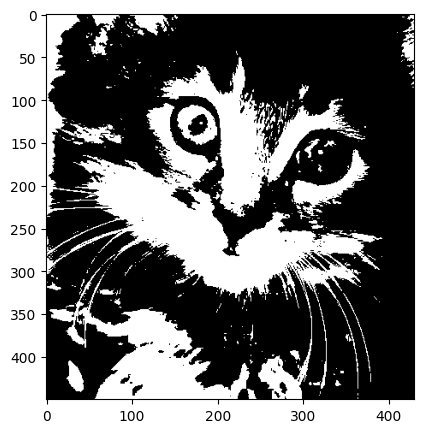

In [13]:
# outra maneira mais "direta" para binarizar uma imagem
limiar = 100
imBin = imCut > limiar   # binariza
plt.figure(figsize=(5,5))
plt.imshow(imBin, 'gray')

Para diferentes valores de **limiar**, teremos diferentes resultados.

Execute o código baixo para ver mais exemplos de limiares.

In [35]:
# cria uma lista de cada resultado binarizado, um para cada limiar
limiares = [60, 80, 100, 120, 140]
images = []
for l in limiares:
  imBin = (imCut > l) * 255
  images.append(imBin.copy())


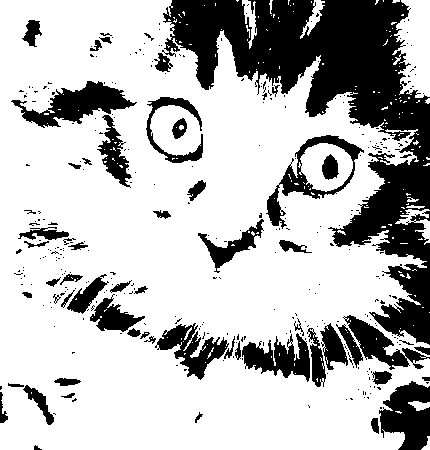

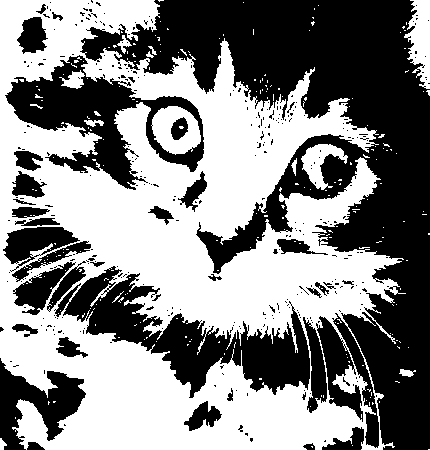

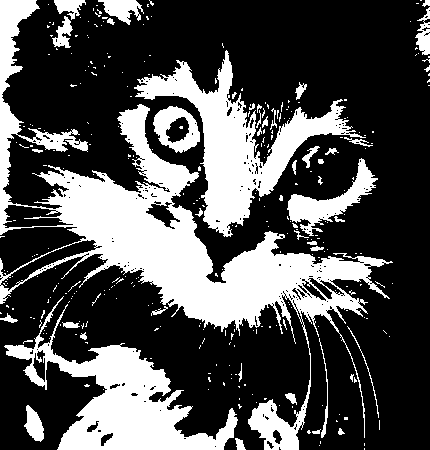

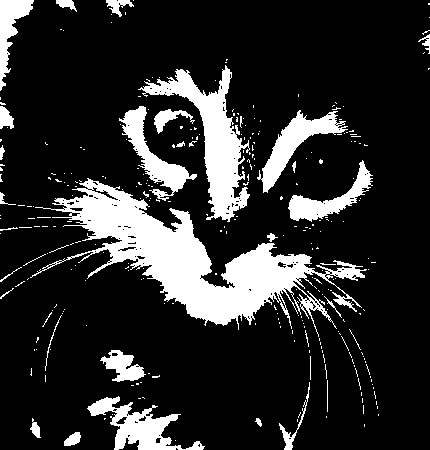

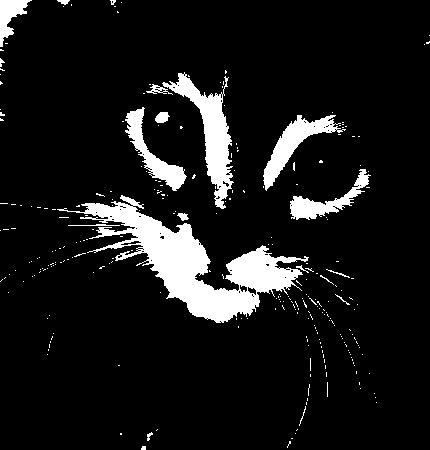

In [36]:
# exibe os resultados
for i in range(len(images)):
  cv2_imshow (images[i])


Opa, o resultado anterior ficou meio feio de ser exibido (na vertical).

Execute o código abaixo para mostrar os resultados agora na horizontal pra ver se fica melhor.

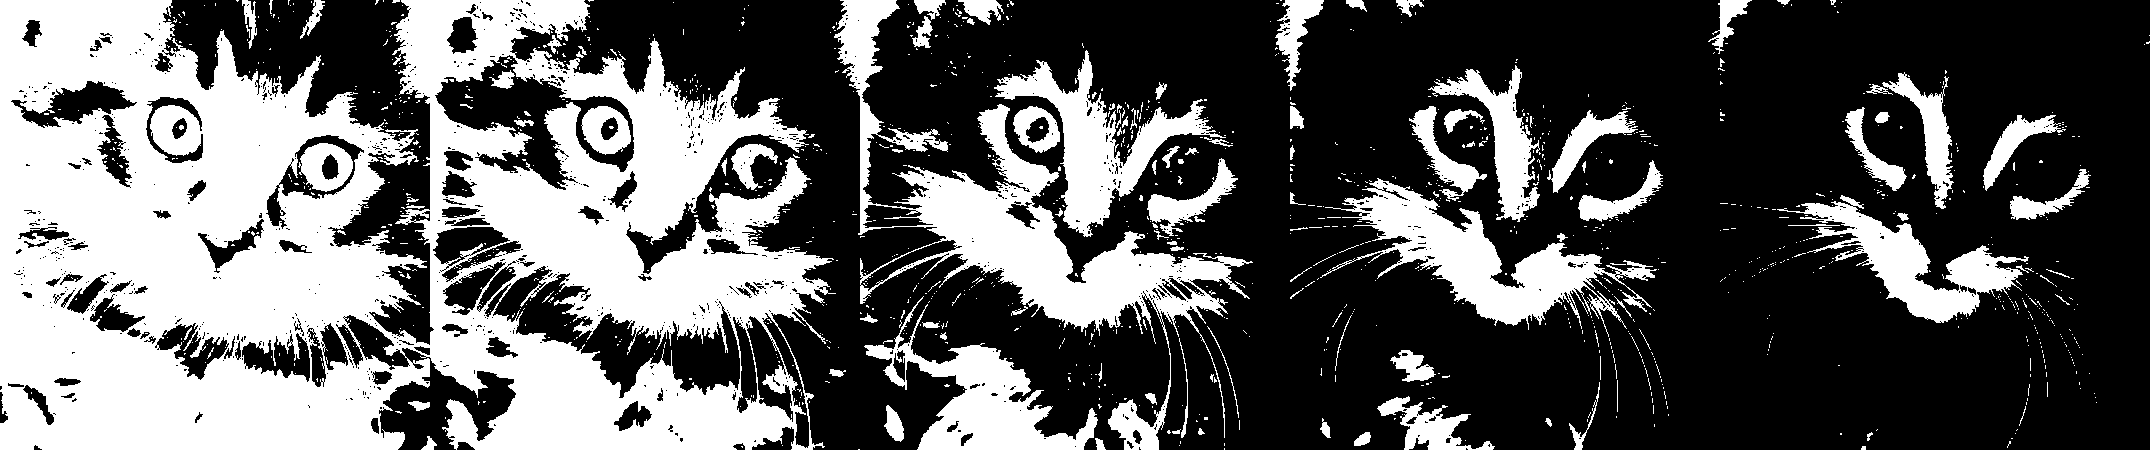

In [16]:
# agora concatena os resultados, um ao lado do outro para facilitar visualizacao
result = cv2.hconcat((images[0], images[1], images[2], images[3], images[4]))
cv2_imshow (result)


Vimos que fica melhor visualizar tudo na horizontal, um ao lado do outro.

Organizamos tudo agora no trecho de código abaixo... execute e veja o resultado.

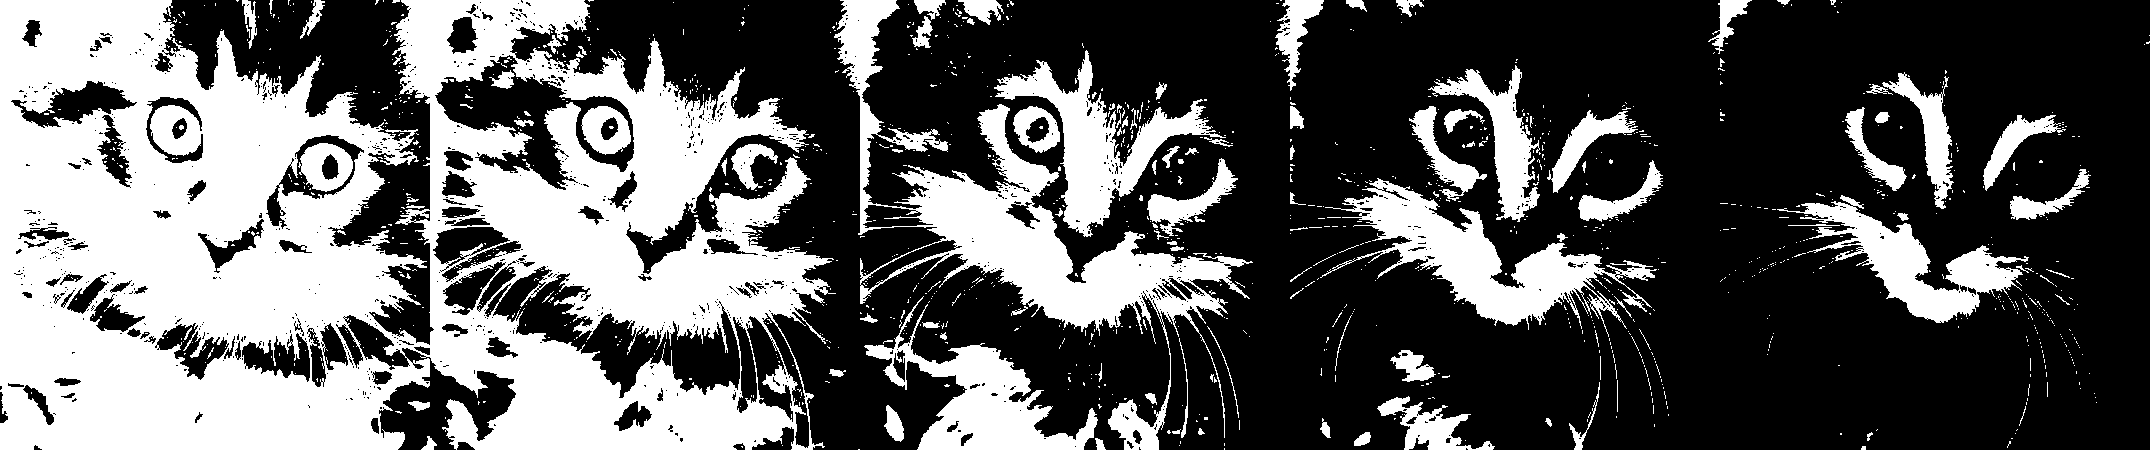

In [17]:
# vimos que visualizar tudo ao lado do outro ficou melhor...
# agora organizamos tudo em um único código
limiares = [60, 80, 100, 120, 140]
cont = 0
images = []
for l in limiares:
  imBin = (imCut > l) * 255
  if cont == 0:
    result = imBin.copy()
  else:
    result = cv2.hconcat ((result, imBin))
  cont += 1
cv2_imshow (result)

### Vetores e Matrizes em Python

Até aqui, vimos algumas manipulações com imagens.

Por exemplo, vimos que as imagens podem ser representadas por matrizes de inteiros (níveis de cinza que variam de 0 a 255).

Para criar vetores e matrizes em python é muito fácil... veja os exemplos abaixo.

In [18]:
# cria um vetor com n zeros
n = 10
vetor = [0] * n
print (vetor)    # lista

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [19]:
vetor[9] = 10
vetor[0] = 1
print (vetor)

[1, 0, 0, 0, 0, 0, 0, 0, 0, 10]


In [20]:
# cria uma matriz n x m preenchida com zeros
n = 3
m = 5
matriz = [[0 for col in range(m)] for row in range(n)]
print (matriz)  # lista de listas

[[0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0]]


In [21]:
matriz[2][4] = 35
matriz[0][0] = 11
matriz[1][3] = 24
print (matriz)

[[11, 0, 0, 0, 0], [0, 0, 0, 24, 0], [0, 0, 0, 0, 35]]


### Operações aritméticas com matrizes

Para que os exemplos anteriores funcionem, converteremos as "listas" para *arrays* com a biblioteca **numpy**.

Abaixo, temos alguns exemplos.

In [22]:
import numpy as np
M = [[1 for col in range(5)] for row in range(3)]
print (M)     # lista
M = np.array (M)   # converte para array, senao nao da certo
print (M)     # array

[[1, 1, 1, 1, 1], [1, 1, 1, 1, 1], [1, 1, 1, 1, 1]]
[[1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]]


In [23]:
# multiplicacao
print (M * 255)

[[255 255 255 255 255]
 [255 255 255 255 255]
 [255 255 255 255 255]]


In [24]:
# outra maneira
M2 = np.ones((3,5),dtype='uint8')*255
print (M2)

[[255 255 255 255 255]
 [255 255 255 255 255]
 [255 255 255 255 255]]


In [25]:
# podemos criar uma matriz de boolean
M3 = np.ones((4,6),dtype='bool')
print (M3)
print (M3.dtype)

[[ True  True  True  True  True  True]
 [ True  True  True  True  True  True]
 [ True  True  True  True  True  True]
 [ True  True  True  True  True  True]]
bool


In [26]:
# se multiplicarmos boolean com inteiro, o resultado vira inteiro
print (M3 * 255)

[[255 255 255 255 255 255]
 [255 255 255 255 255 255]
 [255 255 255 255 255 255]
 [255 255 255 255 255 255]]


In [27]:
# operacoes com matrizes e escalares, resultam em matriz
print (M3 * 255 - 200)

[[55 55 55 55 55 55]
 [55 55 55 55 55 55]
 [55 55 55 55 55 55]
 [55 55 55 55 55 55]]


In [28]:
# operacoes com matrizes e escalares, resultam em matriz
print (M3 * 10 + 200)

[[210 210 210 210 210 210]
 [210 210 210 210 210 210]
 [210 210 210 210 210 210]
 [210 210 210 210 210 210]]


In [29]:
# comparacao entre matriz e escalar resulta em matriz
print (M3*255 <= 0)

[[False False False False False False]
 [False False False False False False]
 [False False False False False False]
 [False False False False False False]]


In [30]:
# matriz com números aleatórios
H, W = 4, 6
K = 255
matriz = (np.random.rand(H, W)*K).astype('uint8')
print (matriz)

[[245 215 243  78  30  32]
 [  3  37 187 147  58 187]
 [ 68  57  46  56 231 207]
 [174 119  62  87 186   3]]


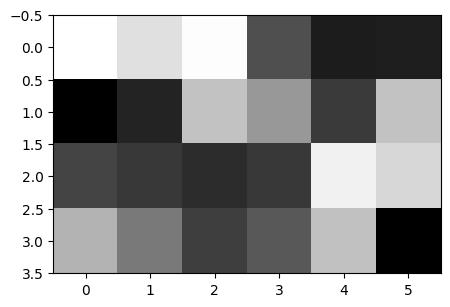

In [31]:
# exibe matriz como uma imagem em níveis de cinza
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
plt.imshow(matriz, 'gray')

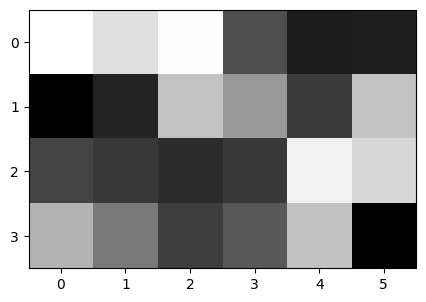

In [32]:
# para mostrar inteiros no eixo vertical
plt.figure(figsize=(5,5))
plt.yticks(range(H))
plt.imshow(matriz, 'gray')

### Exercício 1

Considere a seguinte imagem:

https://drive.google.com/u/3/uc?id=1_z1JK_lLZyUMZcGLysOV6Ks1g0VpGQIR&export=download

Tarefas:

- abra a imagem especificada acima (você pode usar exatamente o link acima)
- imprima o tipo de dados da imagem (*dtype*)
- imprima as dimensões da imagem (*shape*)
- exiba a imagem na tela

Agora responda:

- o que tem nesta imagem?
- ela é colorida ou cinza?
- quais as dimensões da imagem?

uint8
(224, 397)


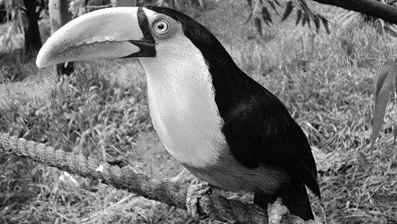

In [42]:
url = "https://drive.google.com/u/3/uc?id=1_z1JK_lLZyUMZcGLysOV6Ks1g0VpGQIR&export=download"
image = io.imread(url)

print(image.dtype)
print(image.shape)

cv2_imshow(image)

**Respostas:** Na imagem tem um Tucano que está na cor cinza, nas dimensões: (224, 397)

### Execício 2

Para a mesma imagem do exercício anterior, obtenha uma imagem binarizada.

Para isto, escolha um valor de **limiar**.

Agora responda:

- qual valor de limiar escolhido e por que?

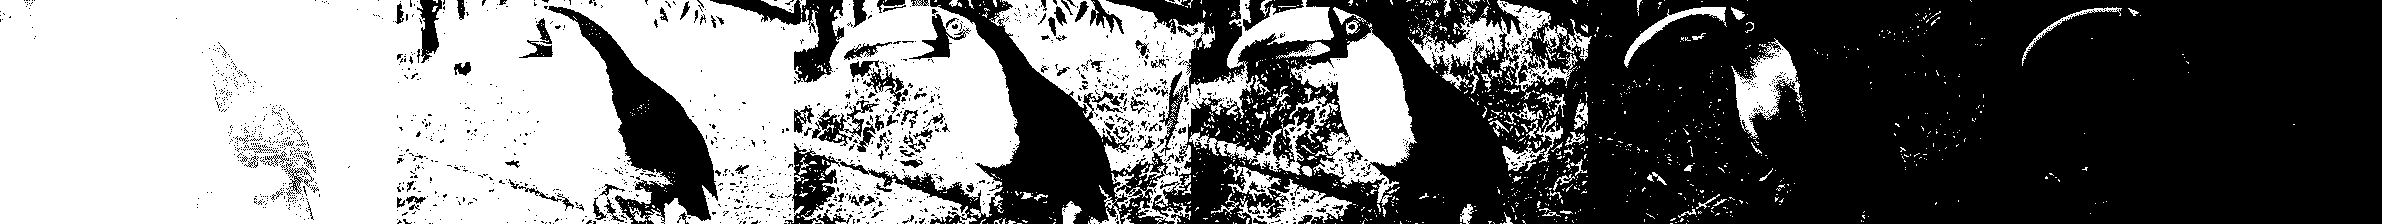

In [44]:
limiares = [0, 50, 100, 150, 200, 250]
cont = 0
images = []
for l in limiares:
  imBin = (image > l) * 255
  if cont == 0:
    result = imBin.copy()
  else:
    result = cv2.hconcat ((result, imBin))
  cont += 1
cv2_imshow (result)

**Resposta:** Foi escolhido limiares de 50 em 50 para capturar as variações de como fica a imagem em cada um deles (Desde um limiar mais próximo a cor branca até a preta).